In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("movie_review.csv")
df.head()

,fold_id,cv_tag,html_id,sent_id,text,tag
0,0,cv000,29590,0,films adapted from comic books have had plenty...,pos
1,0,cv000,29590,1,"for starters , it was created by alan moore ( ...",pos
2,0,cv000,29590,2,to say moore and campbell thoroughly researche...,pos
3,0,cv000,29590,3,"the book ( or "" graphic novel , "" if you will ...",pos
4,0,cv000,29590,4,"in other words , don't dismiss this film becau...",pos


In [ ]:
print(df.columns)

Index(['fold_id', 'cv_tag', 'html_id', 'sent_id', 'text', 'tag'], dtype='object')


In [ ]:
columns_to_drop = ["fold_id","cv_tag","html_id","sent_id"]
for col in columns_to_drop:
    if col not in df.columns:
        print(f"{col} not found in DataFrame")

In [ ]:
df = df.drop(columns=["fold_id", "cv_tag", "html_id", "sent_id"])

In [ ]:
df.head()

,text,tag
0,films adapted from comic books have had plenty...,pos
1,"for starters , it was created by alan moore ( ...",pos
2,to say moore and campbell thoroughly researche...,pos
3,"the book ( or "" graphic novel , "" if you will ...",pos
4,"in other words , don't dismiss this film becau...",pos


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder= LabelEncoder()

label_encoder.fit(df["tag"])

labels=label_encoder.transform(df["tag"])

df["labels"]=labels

df.head()


,text,tag,labels
0,films adapted from comic books have had plenty...,pos,1
1,"for starters , it was created by alan moore ( ...",pos,1
2,to say moore and campbell thoroughly researche...,pos,1
3,"the book ( or "" graphic novel , "" if you will ...",pos,1
4,"in other words , don't dismiss this film becau...",pos,1


In [ ]:
df=df.drop(["tag"], axis=1)
df.head()

,text,labels
0,films adapted from comic books have had plenty...,1
1,"for starters , it was created by alan moore ( ...",1
2,to say moore and campbell thoroughly researche...,1
3,"the book ( or "" graphic novel , "" if you will ...",1
4,"in other words , don't dismiss this film becau...",1


In [ ]:
df.shape

(64720, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64720 entries, 0 to 64719
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    64720 non-null  object
 1   labels  64720 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1011.4+ KB


In [ ]:
df.describe()

,labels
count,64720.000000
mean,0.508915
std,0.499924
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
df["labels"].value_counts()

labels
1    32937
0    31783
Name: count, dtype: int64

<Axes: xlabel='labels'>

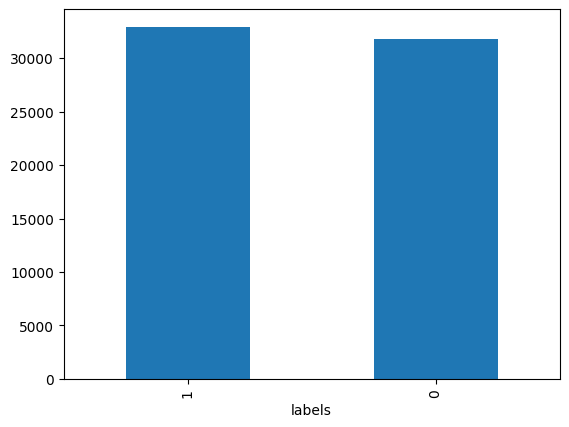

In [ ]:
df['labels'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'label distribution')

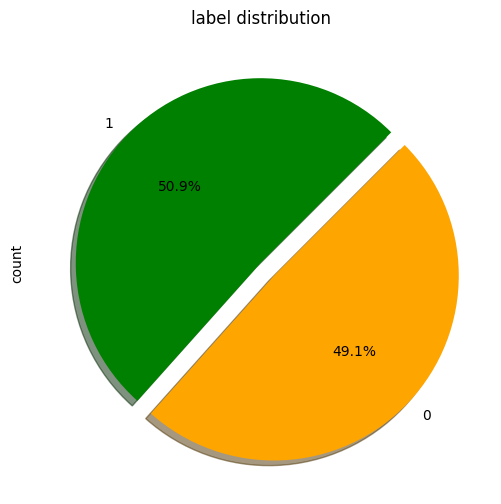

In [ ]:
plt.figure(figsize=(10,6))
colors = ['green', 'orange']
df['labels'].value_counts().plot(kind='pie', autopct='%.1f%%',shadow = True,colors = colors,startangle = 45,
                 explode=(0, 0.1))
plt.title('label distribution')

In [ ]:
df["text"][1]

"for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen ."

# Cleaning steps
removing HTML Tags
extracting emojies # The pattern re.compile('(?::|;|=)(?:-)?(?:)|(|D|P)') is a regular expression used to match and extract emojis from a given text.
removing special chars,puntuation,sumbols
lower casing
removing stopwords
tokenization **bold text**

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)')

def preprocessing(text):
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')

    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set]

    return " ".join(text)

In [ ]:
preprocessing('this is my tags <h1> :) <p>helo world<p> <div> <div> </h2>')   # to check whether the function is working properly or not

'tag helo world :)'

In [ ]:
df['text'] = df['text'].apply(lambda x: preprocessing(x))

In [ ]:
df["text"]

0        film adapt comic book plenti success whether s...
1        starter creat alan moor eddi campbel brought m...
2        say moor campbel thoroughli research subject j...
3        book graphic novel 500 page long includ nearli...
4                                  word dismiss film sourc
                               ...                        
64715               lack inspir trace back insipid charact
64716    like mani skit current incarn _saturday_night_...
64717    watch one roxburi skit snl come away charact b...
64718                                 bump unsuspect women
64719          watch _a_night_at_the_roxbury_ left exactli
Name: text, Length: 64720, dtype: object

### Visualizing Negative and Positive Words

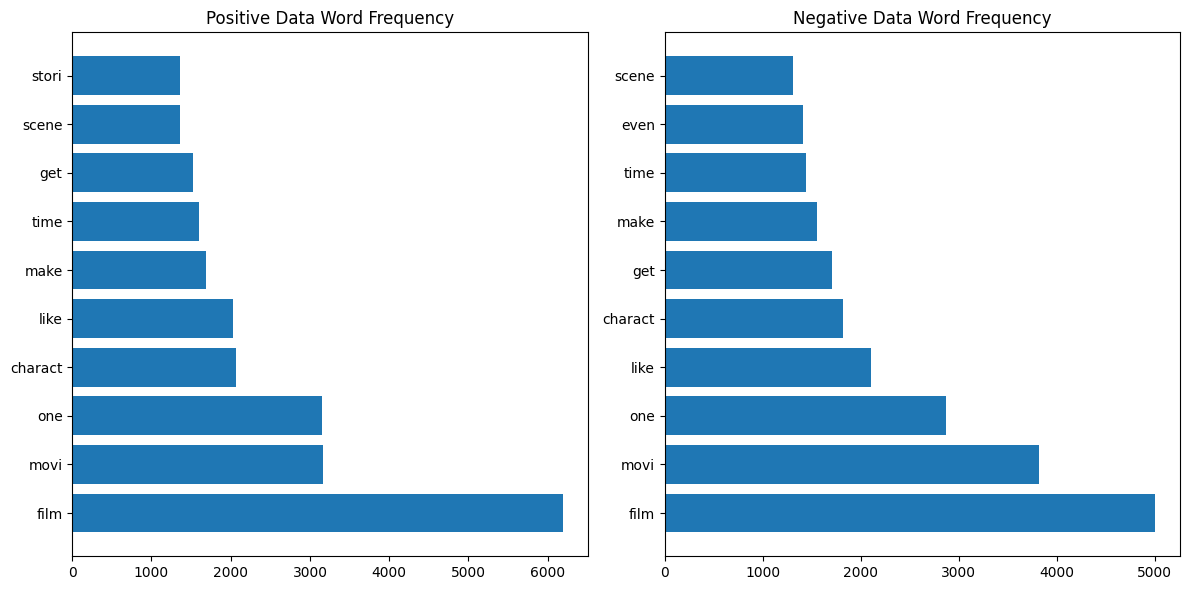

In [ ]:
positivedata = df[df['labels'] == 1]
positivedata = positivedata['text']
negdata = df[df['labels'] == 0]
negdata = negdata['text']

import matplotlib.pyplot as plt
from collections import Counter

# Positive data
positivedata_words = ' '.join(positivedata).split()
positivedata_word_counts = Counter(positivedata_words)
positivedata_common_words = positivedata_word_counts.most_common(10)  # Display top 10 common words

# Negative data
negdata_words = ' '.join(negdata).split()
negdata_word_counts = Counter(negdata_words)
negdata_common_words = negdata_word_counts.most_common(10)  # Display top 10 common words

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Positive data word frequency
axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words], align='center')
axes[0].set_yticks(range(len(positivedata_common_words)))
axes[0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words], align='center')
axes[1].set_yticks(range(len(negdata_common_words)))
axes[1].set_yticklabels([word for word, _ in negdata_common_words])
axes[1].set_title('Negative Data Word Frequency')

plt.tight_layout()
plt.show()

### TF-IDF Vertorizer to convert the raw documents into feature matrix

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=df.labels.values
x=tfidf.fit_transform(df.text)

### Training Machine Learning Model for Sentiment Analysis

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  3.0min finished


In [ ]:
from sklearn.metrics import accuracy_score

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6882725587144622


In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

y_pred_1 = logistic_regression.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_1))

Accuracy: 0.6837917181705809


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred_2 = decision_tree.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_2)
print("Accuracy:", accuracy)

Accuracy: 0.5771786155747837


In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_3 = random_forest.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_3)
print("Accuracy:", accuracy)

Accuracy: 0.6439276885043264


In [ ]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
y_pred_4 = gradient_boosting.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6882725587144622


In [ ]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_5 = svm_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_5)
print("Accuracy:", accuracy)

Accuracy: 0.6932941903584673
